In [26]:
import pandas as pd
import os
from msalign import msalign
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from BaselineRemoval import BaselineRemoval as blr

In [27]:
df = pd.read_csv('binned2.csv')

In [28]:
df.Serovar.unique()

array(['Enteritidis', 'Agona', 'Altona', 'Albany', 'Typhimurium'],
      dtype=object)

In [44]:
def detect_peaks(mass_spectrum, threshold=30, distance=500):
    peaks, _ = find_peaks(mass_spectrum, height=threshold, distance=distance)
    return peaks

Enteritidis
[  175   784  1578  2302  3222  3853  4382  4886  5840  6702  7316  7891
  8431  8963  9544 10046 10610 11177 11723 12624 13429 14071]
2180.6      1698.789903
2824.0      1720.591477
3630.0      1710.038009
4364.4     14867.851922
5382.0     12761.477871
6095.6     18297.254572
6687.0       521.862969
7262.2     12304.672133
8330.0     11101.189612
9523.6     16371.502517
10285.8     4951.785501
10955.7     3155.569909
11576.5      528.530500
12223.3     1731.808756
13025.6     1101.828214
13749.4      193.881700
14494.2      381.887210
15221.7      555.433246
16012.7      613.691052
17465.3      418.901982
18632.6      730.999196
19537.2      348.056858
dtype: float64


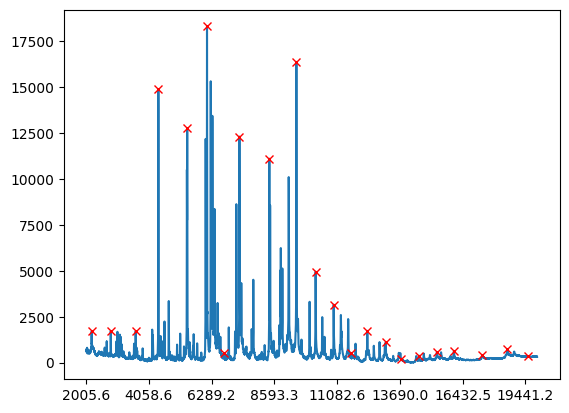

In [49]:
sum_df = pd.DataFrame()
for serovar in df.Serovar.unique()[:1]:
    print(serovar)
    srv_df = df.loc[df.Serovar == serovar].reset_index(drop=True)
    subset_df = srv_df.drop(columns=['Serovar']) 
    ref_df = subset_df.mean()
    ref_df.index = ref_df.index.astype(str)
    peaks = detect_peaks(ref_df.to_numpy())
    print(peaks)
    print(ref_df[peaks])
    peaks_col = [float(x) for x in ref_df.index[peaks]]
    ref_df.plot()
    plt.plot(peaks, ref_df[peaks], 'rx', label='Peaks')
    x = ref_df.index.astype(float)
    array = subset_df.to_numpy()
    aligned = msalign(x, array, peaks_col, weights=ref_df[peaks], only_shift=False, align_by_index=True)
    aligned_df = pd.DataFrame(aligned, columns=ref_df.index)
    aligned_df.columns = aligned_df.columns.astype(float)
    sum_df = pd.concat([sum_df,aligned_df],sort=True)

In [50]:
sum_df['Serovar'] = df.Serovar

In [55]:
index_first = 2000
index_last = 2400

<Axes: >

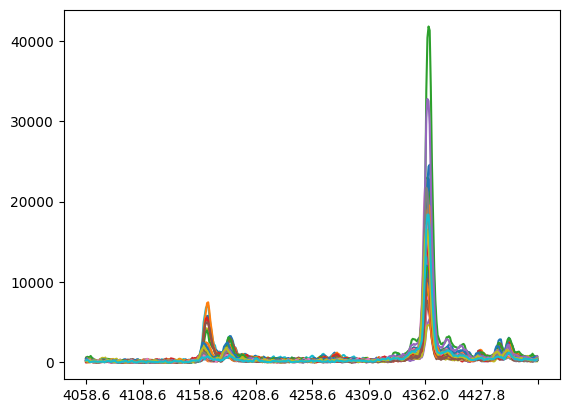

In [56]:
df[df.Serovar == 'Enteritidis'].drop(columns=['Serovar']).iloc[:,index_first:index_last].T.plot(legend=None)

<Axes: >

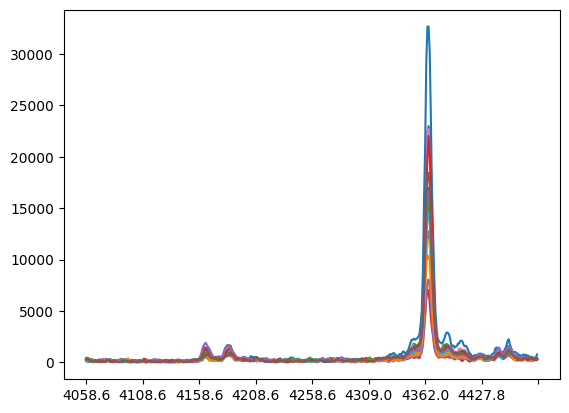

In [57]:
sum_df[sum_df.Serovar == 'Enteritidis'].drop(columns=['Serovar']).iloc[:,index_first:index_last].T.plot(legend=None)

In [58]:
for i,k in sum_df[sum_df.Serovar == 'Enteritidis'].iterrows():
    print(k)

2005.6             0.0
2006.6      625.820734
2007.6      697.421781
2008.6      670.490669
2009.6      496.772989
              ...     
19948.1      270.68072
19949.6     269.776854
19951.2            0.0
19952.7            0.0
Serovar    Enteritidis
Name: 0, Length: 14377, dtype: object
2005.6             0.0
2006.6             0.0
2007.6      442.108328
2008.6      446.942907
2009.6      473.511369
              ...     
19948.1     196.460262
19949.6     202.154306
19951.2     188.165527
19952.7     178.798938
Serovar    Enteritidis
Name: 1, Length: 14377, dtype: object
2005.6             0.0
2006.6             0.0
2007.6      572.482783
2008.6      517.927953
2009.6      416.946892
              ...     
19948.1     332.423635
19949.6     340.051653
19951.2     350.823148
19952.7            0.0
Serovar    Enteritidis
Name: 2, Length: 14377, dtype: object
2005.6             0.0
2006.6      560.874471
2007.6      469.640739
2008.6      493.701166
2009.6      576.987464
            